# Loan Approval

**1. Data Source**  
This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data.  
**SMOTENC** was used to simulate new data points to enlarge the instances.  
The dataset is structured for both categorical and continuous features.

**2. Metadata**  
The dataset contains **45,000 records** and **14 variables**, each described below:

| Column                         | Description                                          | Type        |
|--------------------------------|------------------------------------------------------|-------------|
| **person_age**                 | Age of the person                                   | Float       |
| **person_gender**              | Gender of the person                                | Categorical |
| **person_education**           | Highest education level                             | Categorical |
| **person_income**              | Annual income                                       | Float       |
| **person_emp_exp**             | Years of employment experience                      | Integer     |
| **person_home_ownership**      | Home ownership status (e.g., rent, own, mortgage)   | Categorical |
| **loan_amnt**                  | Loan amount requested                               | Float       |
| **loan_intent**                | Purpose of the loan                                 | Categorical |
| **loan_int_rate**              | Loan interest rate                                  | Float       |
| **loan_percent_income**        | Loan amount as a percentage of annual income        | Float       |
| **cb_person_cred_hist_length** | Length of credit history in years                   | Float       |
| **credit_score**               | Credit score of the person                          | Integer     |
| **previous_loan_defaults_on_file** | Indicator of previous loan defaults             | Categorical |
| **loan_status (target)**       | Loan approval status: `1 = approved`, `0 = rejected` | Integer     |

**3. Data Usage**  
This dataset can be used for multiple purposes:  

- **Exploratory Data Analysis (EDA):** Analyze key features, distribution patterns, and relationships to understand credit risk factors.  
- **Classification:** Build predictive models to classify the `loan_status` variable (approved/not approved) for potential applicants.  


In [240]:
!head loan_data.csv

person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.9,0.35,2.0,544,No,1


In [241]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import torch
import torch.nn as nn
from torch.nn.functional import one_hot
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split
import pytorch_lightning as pl
from torchmetrics.classification import Accuracy, ConfusionMatrix


from statsmodels.graphics.mosaicplot import mosaic
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [242]:
# reading dataset
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [243]:
# Show DataFrame info and shape
df.info()
print('=' * 50)
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [244]:
# Check for missing values
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [245]:
# Check for duplicated rows
df.duplicated().sum()

0

In [246]:
# Summary Statistic 
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


The maximum age in the dataset is 144, which appears to be an outlier. This issue will need to be addressed, but further examination is required to identify how many records have ages above 100

In [252]:
df.query('person_age > 100')


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


In [253]:
df.query('person_age > 100').shape[0]

7

Since only 7 records are affected, removing these observations will not significantly impact the analysis.

In [178]:
# dropping observations where person_age >= 100
df = df[df['person_age'] <= 100]

In [179]:
df = df.reset_index(drop=True)

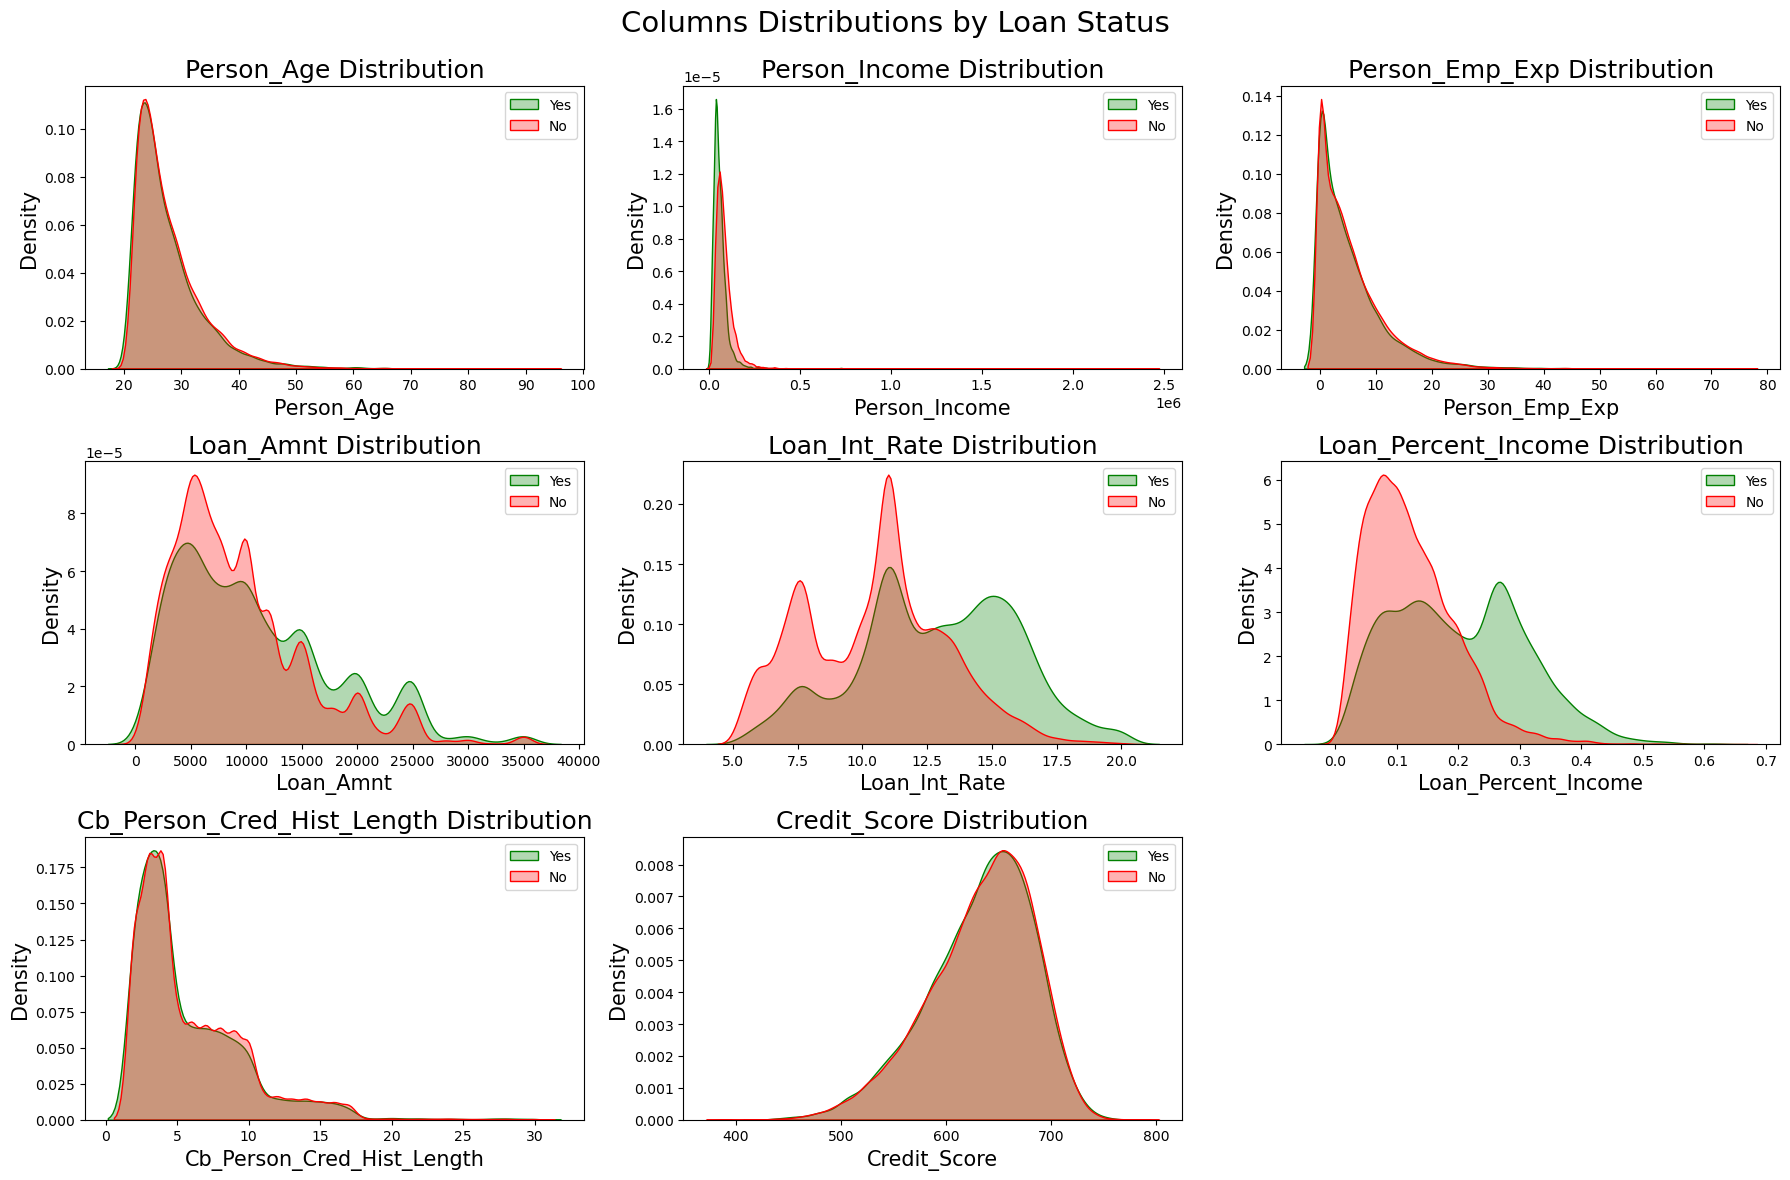

In [181]:
# Select numerical columns without target
numerical_column_names = df.drop(columns=['loan_status']).select_dtypes(include=['float', 'int']).columns.tolist()

num_cols = 3

# Calculate required subplot rows
if len(numerical_column_names)%num_cols == 0:
    num_rows = len(numerical_column_names)//num_cols
else:
    num_rows = (len(numerical_column_names)//num_cols) + 1


fig, ax = plt.subplots(figsize=(18, 12), nrows=num_rows, ncols=num_cols)
ax = ax.flatten()

fig.suptitle("Columns Distributions by Loan Status", fontsize=21)

# Plot distributions per numerical column
for idx, col in enumerate(numerical_column_names):
    loan_yes = df[df['loan_status'] == 1][col]
    loan_no = df[df['loan_status'] == 0][col]
    sns.kdeplot(loan_yes, color='green', fill=True, alpha=0.3, ax=ax[idx])
    sns.kdeplot(loan_no, color='red', fill=True, alpha=0.3, ax=ax[idx])
    ax[idx].set_title(col.title()+' Distribution', fontsize=18)
    ax[idx].set_xlabel(col.title(), fontsize=15)
    ax[idx].set_ylabel('Density', fontsize=15)
    ax[idx].legend(['Yes', 'No', 'Both'])


# Remove unused subplots
for j in range(idx+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

The plots show that approved loans are associated with higher interest rates and higher loan amounts as a percentage of annual income compared to non-approved loans

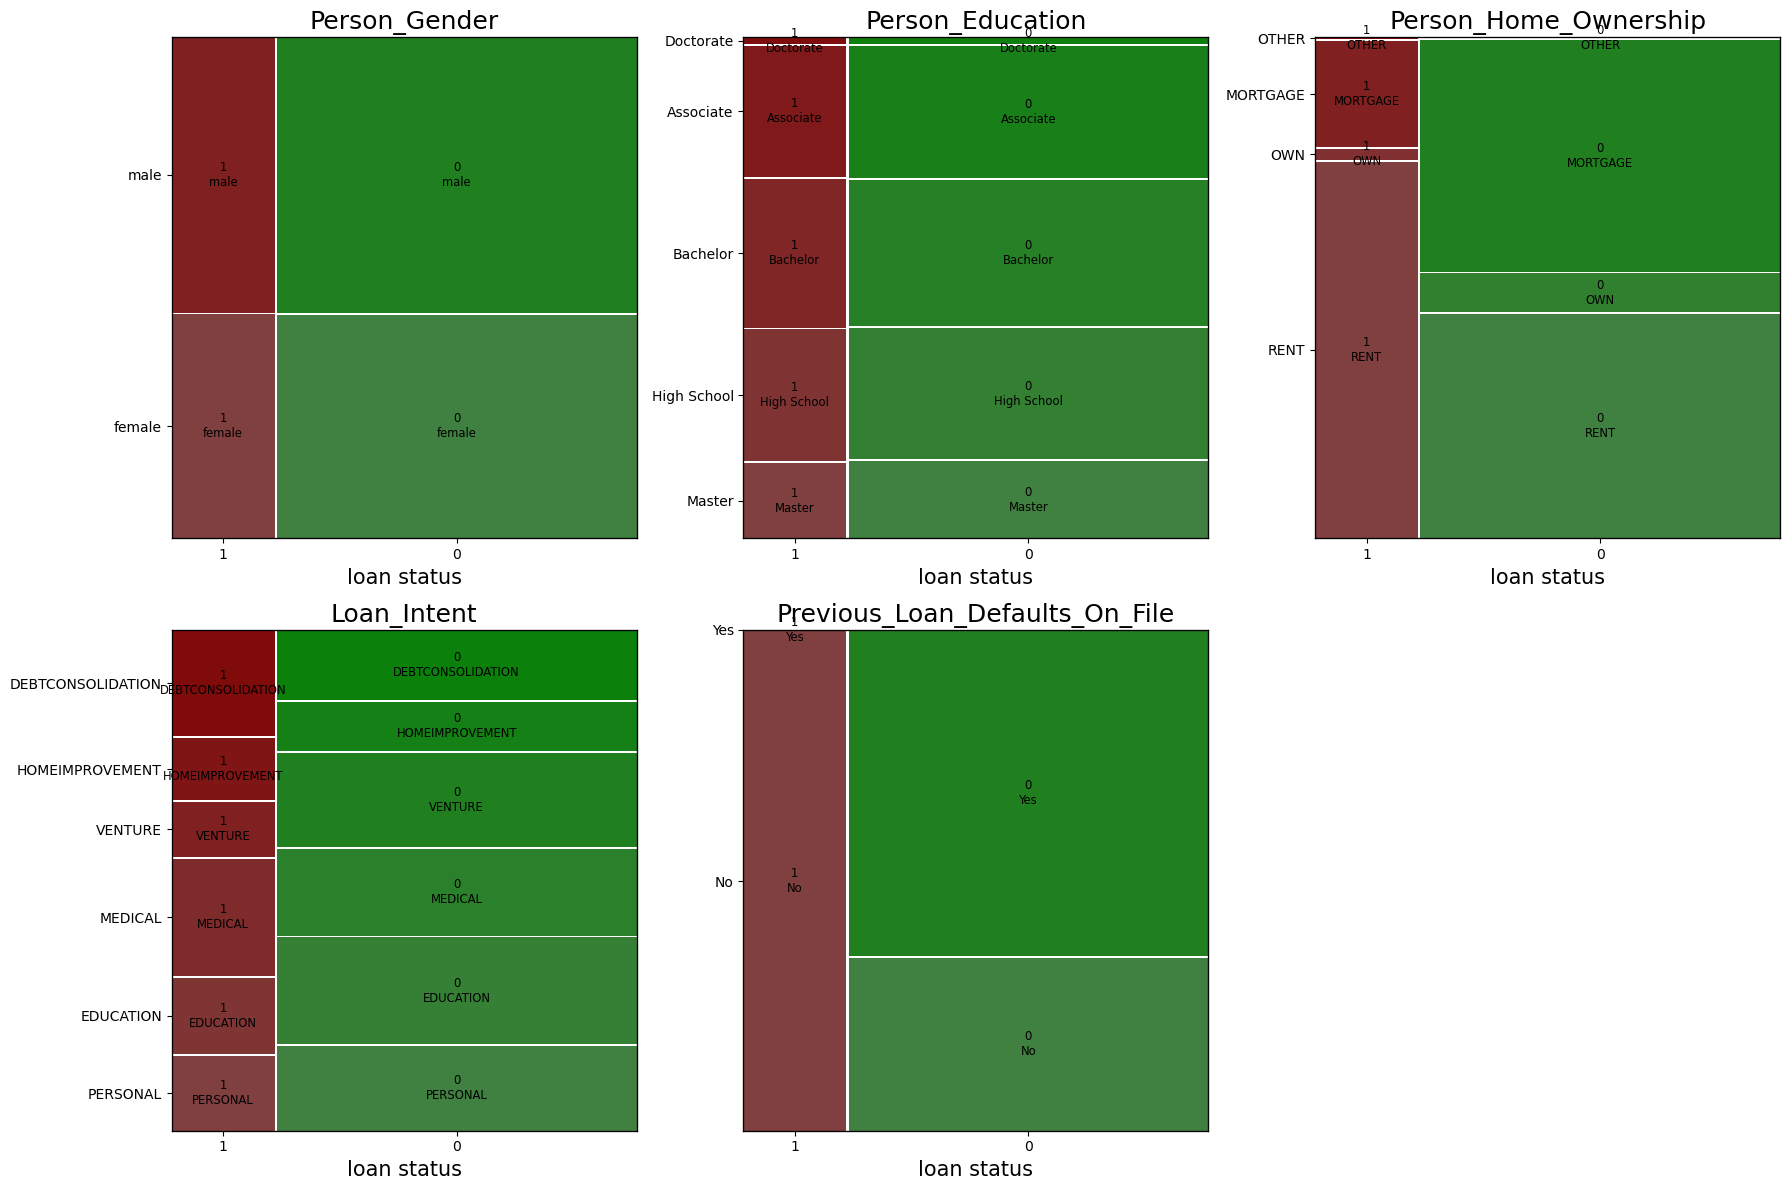

In [182]:
# List of categorical column names
categorical_column_names = df.select_dtypes(include=['object']).columns.tolist()

num_cols = 3

# Compute number of rows  for subplot grid
if len(categorical_column_names)%num_cols == 0:
    num_rows = len(categorical_column_names)//num_cols
else:
    num_rows = (len(categorical_column_names)//num_cols) + 1


fig, ax = plt.subplots(figsize=(18, 12), nrows=num_rows, ncols=num_cols)
ax = ax.flatten()


# Plot mosaic plots showing relationship between loan_status and each categorical feature
for idx, col in enumerate(categorical_column_names):
    mosaic(df, ['loan_status',col], ax=ax[idx])
    ax[idx].set_title(col.title(), fontsize=18)
    ax[idx].set_xlabel('loan status', fontsize=15)
    
   


# Remove unused subplots
for j in range(idx+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

The mosaic plots indicate that loan intent, previous loan defaults on file, and home ownership are strongly associated with loan approval status.  
Now confirming it statistically.

In [183]:
from scipy.stats import chi2_contingency

for col in categorical_column_names:
    loan_crosstab = pd.crosstab(df['loan_status'], df[col])
    chi, p, dof, expected = chi2_contingency(loan_crosstab)
    print("=" * 50)
    print('Chi-square statistic:', chi)
    print(f'All expected > 5: {np.all(expected>5)}') # checking for assumption
    print('p-value:', p)
    if p < 0.05:
        print(f'There is a significant relationship between loan status and {col}.')
    else:
        print(f'No significant relationship between loan status and {col}.')

Chi-square statistic: 0.010387644576013037
All expected > 5: True
p-value: 0.918820337785659
No significant relationship between loan status and person_gender.
Chi-square statistic: 2.0340316156793836
All expected > 5: True
p-value: 0.7294994159798525
No significant relationship between loan status and person_education.
Chi-square statistic: 2989.315547121723
All expected > 5: True
p-value: 0.0
There is a significant relationship between loan status and person_home_ownership.
Chi-square statistic: 908.5957854457605
All expected > 5: True
p-value: 3.6706256566266856e-194
There is a significant relationship between loan status and loan_intent.
Chi-square statistic: 13272.7141193279
All expected > 5: True
p-value: 0.0
There is a significant relationship between loan status and previous_loan_defaults_on_file.


In [184]:
# Split dataset: 80% train, 20% test
df_train, df_test = train_test_split(df, train_size=0.8, random_state=1)

In [185]:
# Standardizing the numerical columns in both DataFrames

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

sc = StandardScaler()

df_train_norm[numerical_column_names] = sc.fit_transform(df_train_norm[numerical_column_names])
df_test_norm[numerical_column_names] = sc.transform(df_test_norm[numerical_column_names])

In [186]:
df_train_norm.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
3474,-0.802549,male,High School,-0.556274,-0.908713,OWN,-0.570033,EDUCATION,-0.702510,-0.113349,-0.738762,0.086632,Yes,0
27499,0.378169,female,High School,1.495514,0.100437,MORTGAGE,-0.570033,VENTURE,-1.370074,-1.257390,0.033417,-1.582078,No,0
22768,-0.127853,female,High School,-0.269981,-0.067755,MORTGAGE,-1.043980,HOMEIMPROVEMENT,1.665833,-1.028582,0.033417,-0.489470,No,1
17810,-0.633875,male,Associate,-0.420759,-0.404138,RENT,0.188282,EDUCATION,-1.869908,0.687480,-0.481369,0.483944,Yes,0
40015,-0.465201,female,Bachelor,-0.207748,-0.235947,RENT,-0.885997,MEDICAL,0.354187,-0.914177,-0.481369,0.603138,Yes,0


In [187]:
# Encode categorical variables using LabelEncoder
for col in categorical_column_names:
    encoder = LabelEncoder()
    df_train_norm[col] = encoder.fit_transform(df_train_norm[col])
    df_test_norm[col] = encoder.transform(df_test_norm[col])
    
# Dictionary storing the number of unique values per categorical column
totals = {}
for col in categorical_column_names:
    totals[col] = len(set(df_train_norm[col]))
    
# Convert normalized numerical columns to PyTorch tensors
x_train = torch.tensor(df_train_norm[numerical_column_names].values).float()
x_test = torch.tensor(df_test_norm[numerical_column_names].values).float()

# One-hot encode categorical features and concatenate with numeric features
for col in categorical_column_names:
    one_hot_train = one_hot(torch.tensor(df_train_norm[col].values).long(), num_classes=totals[col])
    x_train = torch.cat([x_train, one_hot_train], dim=1)
    one_hot_test = one_hot(torch.tensor(df_test_norm[col].values).long(), num_classes=totals[col])
    x_test = torch.cat([x_test, one_hot_test], dim=1)

In [188]:
# Convert target column loan_status to PyTorch tensors
y_train = torch.tensor(df_train_norm['loan_status'].values).float()
y_test = torch.tensor(df_test_norm['loan_status'].values).float()

In [189]:
class LoadDataModule(pl.LightningDataModule):
    def __init__(self, x_train, y_train, x_test, y_test, batch_size = 32):
        # Store batch size and datasets
        super().__init__()
        self.batch_size = batch_size
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def setup(self, stage=None):
        # Combine training features and targets into a TensorDatset
        train_ds_full = TensorDataset(self.x_train, self.y_train)

        # Split into training and validation sets( 90% train, 10% validation)
        train_size = int(0.9 * len(train_ds_full))
        val_size = len(train_ds_full) - train_size
        self.train_ds, self.val_ds = random_split(
            train_ds_full, [train_size, val_size], generator=torch.Generator().manual_seed(1))
        
        self.test_ds = TensorDataset(self.x_test, self.y_test)

    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size = self.batch_size, num_workers=4, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size, num_workers=4)

    def test_dataloader(self):
        return DataLoader(self.test_ds, batch_size=self.batch_size, num_workers=4)

In [230]:
class MultiLayerPerceptron(pl.LightningModule):
    def __init__(self, hidden_units=(32, 16)):
        super().__init__()
        
        # Metrics for monitoring
        self.train_acc = Accuracy(task='binary')
        self.valid_acc = Accuracy(task='binary')
        self.test_acc = Accuracy(task='binary')
        self.confmat = ConfusionMatrix(task='binary')
        
        # Build sequential MLP
        input_size = x_train.shape[1]
        all_layers = []
        for hidden_unit in hidden_units:
            layer = nn.Linear(input_size, hidden_unit)
            all_layers.append(layer)
            all_layers.append(nn.ReLU())
            input_size = hidden_unit # Update input size for next layer

        all_layers.append(nn.Linear(hidden_units[-1], 1)) # Output layer (1 neuron for binary)
        self.model = nn.Sequential(*all_layers) # Create sequential model

    def forward(self, x):
        # Forward pass through the network
        x = self.model(x).squeeze(1)
        return x

    def training_step(self, batch, batch_idx):
        # Training step executed for each batch
        x, y = batch
        logits = self(x)
        loss = nn.functional.binary_cross_entropy_with_logits(logits, y)
        pred = torch.sigmoid(logits)
        self.train_acc(pred, y)
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", self.train_acc, prog_bar=True, on_step=False, on_epoch=True)
        return loss


    def validation_step(self, batch, batch_idx):
        # Validation step executed for each batch
        x, y = batch
        logits = self(x)
        loss = nn.functional.binary_cross_entropy_with_logits(logits, y)
        pred = torch.sigmoid(logits)
        self.valid_acc(pred, y)
        self.log("valid_loss", loss, prog_bar=True)
        self.log("valid_acc", self.valid_acc, prog_bar=True, on_step=False, on_epoch=True)
        return loss


    def test_step(self, batch, batch_idx):
        # Test step executed for each batch
        x, y = batch
        logits = self(x)
        loss = nn.functional.binary_cross_entropy_with_logits(logits, y)
        pred = torch.sigmoid(logits)
        self.test_acc(pred, y)
        self.confmat(pred, y)
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.test_acc, prog_bar=True, on_step=False, on_epoch=True)
        return loss


    def configure_optimizers(self):
        # Define optimizer
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

In [231]:
torch.set_float32_matmul_precision("medium")

In [232]:
from pytorch_lightning.callbacks import ModelCheckpoint

# Assign the model
loan_classifier = MultiLayerPerceptron()
loan_data = LoadDataModule(x_train, y_train, x_test, y_test)

# Save the best model based on validation accuracy
callbacks = [ModelCheckpoint(save_top_k=1, mode='max', monitor="valid_acc")] # save top 1 model

if torch.cuda.is_available(): # if you have GPUs
    trainer = pl.Trainer(max_epochs=10, callbacks=callbacks, accelerator='gpu')
else:
    trainer = pl.Trainer(max_epochs=10, callbacks=callbacks)

# Start training
trainer.fit(model=loan_classifier, datamodule=loan_data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                  | Params | Mode 
------------------------------------------------------------
0 | train_acc | BinaryAccuracy        | 0      | train
1 | valid_acc | BinaryAccuracy        | 0      | train
2 | test_acc  | BinaryAccuracy        | 0      | train
3 | confmat   | BinaryConfusionMatrix | 0      | train
4 | model     | Sequential            | 1.4 K  | train
------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [235]:
trainer.test(model=loan_classifier, datamodule=loan_data, ckpt_path='best')

Restoring states from the checkpoint path at C:\Users\pc\Data Science\Python\Projects\Loan Approval Classification\lightning_logs\version_8\checkpoints\epoch=5-step=6078.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at C:\Users\pc\Data Science\Python\Projects\Loan Approval Classification\lightning_logs\version_8\checkpoints\epoch=5-step=6078.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.916435182094574     │
│         test_loss         │    0.18722599744796753    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.18722599744796753, 'test_acc': 0.916435182094574}]

The model achieved [{'test_loss': 0.18722599744796753, 'test_acc': 0.916435182094574}]


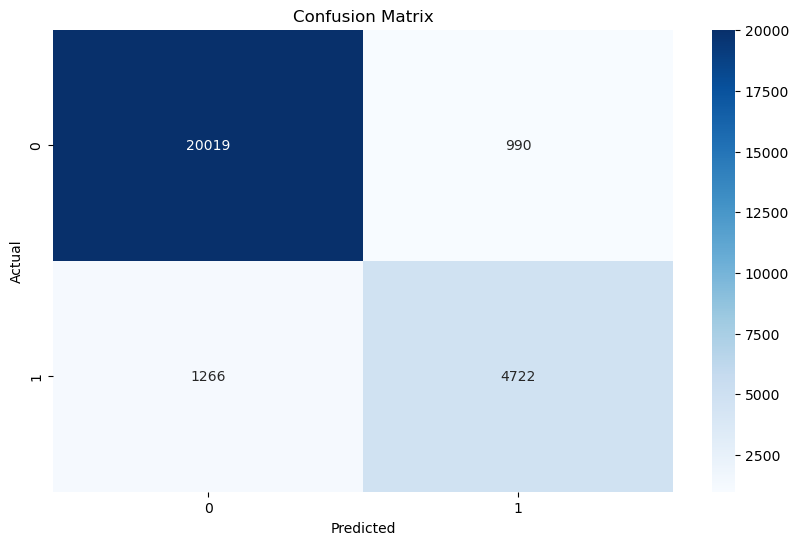

In [239]:
# Get the confusion matrix
cm = loan_classifier.confmat.compute().cpu().numpy() 

# Plot using seaborn heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [203]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 27420), started 0:13:19 ago. (Use '!kill 27420' to kill it.)